In [11]:
import pandas as pd
import numpy as np
from scipy import signal
import random

from fastdtw import fastdtw

In [12]:
x = np.arange(0, 20*np.pi, .1)
y_square = signal.square( np.pi *  x)
y_sawtooth = signal.sawtooth(np.pi * x)
y_sin=np.sin(x)
y_cos=np.cos(x)

# y_square_shifted = signal.square( np.pi *  x+2)
# y_sawtooth_shifted = signal.sawtooth(np.pi * x+2)
# y_sin_shifted =np.sin(x+2)
# y_cos_shifted =np.cos(x+2)

In [13]:
df_waves = pd.DataFrame([x,y_sawtooth,
                         y_square,
                         y_sin,
                         y_cos,
#                          y_square_shifted,
#                          y_sawtooth_shifted,
#                          y_sin_shifted,
#                          y_cos_shifted
                        ]).transpose()

In [14]:
df_waves = df_waves.rename(columns={0:'time',
                                    1:'sawtooth',
                                    2:'square',
                                    3:'sin',
                                    4:'cos',
#                                     5:'sawtooth_shifted',
#                                     6:'square_shifted',
#                                     7:'sin_shifted',
#                                     8:'cos_shifted'
                                   })

<Axes: xlabel='time'>

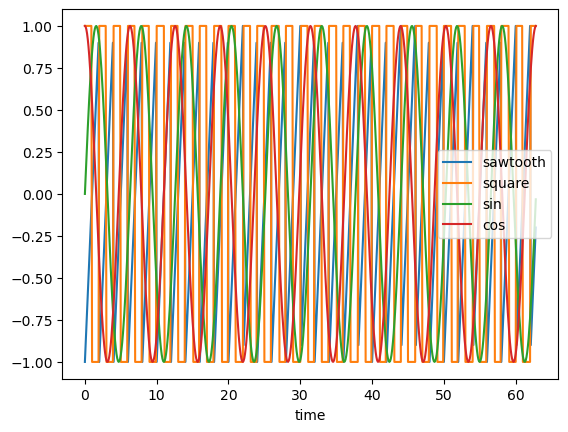

In [15]:
df_waves.plot(x='time')

In [16]:
### Shifting ####

In [17]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import matplotlib.pyplot as plt

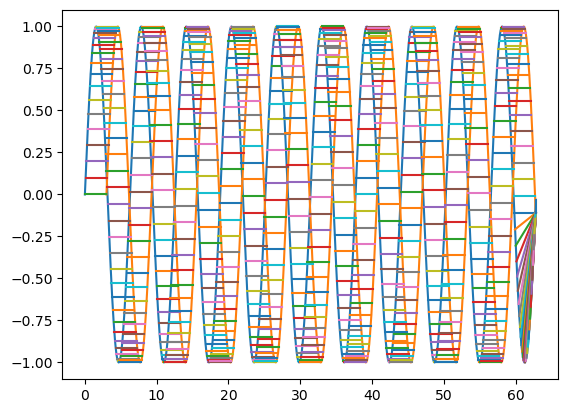

In [18]:
df_waves_shifted = df_waves.copy()
df_waves_shifted['sin_shifted'] = df_waves_shifted['sin'].shift(30)

dist_1, warp_path = fastdtw(np.array(df_waves_shifted['sin']).reshape(-1,1),
        np.array(df_waves_shifted['sin_shifted'].dropna()).reshape(-1,1),dist=euclidean)

plt.plot(np.array(df_waves_shifted['time']).reshape(-1,1),
         np.array(df_waves_shifted['sin']).reshape(-1,1))
plt.plot(np.array(df_waves_shifted['time']).reshape(-1,1),
         np.array(df_waves_shifted['sin_shifted']).reshape(-1,1))

count = 0
for i,j in warp_path:
    plt.plot([df_waves_shifted.iloc[i]['time'],df_waves_shifted.iloc[j+30]['time']],
             [df_waves_shifted.iloc[i]['sin'],df_waves_shifted.iloc[j+30]['sin_shifted']])

In [19]:
dist_1

16.749082847526942

In [20]:
euclidean(np.array(df_waves_shifted['sin'][30:]),
        np.array(df_waves_shifted['sin_shifted'].dropna()))

34.4653076212409

In [21]:
#### warping ####

In [95]:
x_warp = np.arange(0, 20*np.pi, .05)
y_square_warp = signal.square( 2*np.pi *  x_warp)
y_sawtooth_warp = signal.sawtooth(2*np.pi * x_warp)
y_sin_warp=np.sin(2*x_warp)
y_cos_warp=np.cos(2*x_warp)

In [102]:
df_waves_warp = pd.DataFrame([x_warp,y_square_warp,
                         y_sawtooth_warp,
                         y_sin_warp,
                         y_cos_warp,
#                          y_square_shifted,
#                          y_sawtooth_shifted,
#                          y_sin_shifted,
#                          y_cos_shifted
                        ]).transpose()[:len(y_cos_warp)//4+1]

In [103]:
df_waves_warp = df_waves_warp.rename(columns={0:'time',
                                    1:'sawtooth',
                                    2:'square',
                                    3:'sin',
                                    4:'cos',
#                                     5:'sawtooth_shifted',
#                                     6:'square_shifted',
#                                     7:'sin_shifted',
#                                     8:'cos_shifted'
                                   })

df_waves_warp=df_waves_warp[:]

In [104]:
truncate = len(df_waves)

In [105]:
df_waves

,time,sawtooth,square,sin,cos
0,0.0,-1.0,1.0,0.000000,1.000000
1,0.1,-0.9,1.0,0.099833,0.995004
2,0.2,-0.8,1.0,0.198669,0.980067
3,0.3,-0.7,1.0,0.295520,0.955336
4,0.4,-0.6,1.0,0.389418,0.921061
...,...,...,...,...,...
624,62.4,-0.6,1.0,-0.418554,0.908192
625,62.5,-0.5,1.0,-0.325796,0.945440
626,62.6,-0.4,1.0,-0.229781,0.973242
627,62.7,-0.3,1.0,-0.131471,0.991320


In [106]:
df_waves_warp

,time,sawtooth,square,sin,cos
0,0.00,1.0,-1.000000e+00,0.000000,1.000000
1,0.05,1.0,-9.000000e-01,0.099833,0.995004
2,0.10,1.0,-8.000000e-01,0.198669,0.980067
3,0.15,1.0,-7.000000e-01,0.295520,0.955336
4,0.20,1.0,-6.000000e-01,0.389418,0.921061
...,...,...,...,...,...
310,15.50,1.0,-1.110223e-15,-0.404038,0.914742
311,15.55,-1.0,1.000000e-01,-0.310697,0.950509
312,15.60,-1.0,2.000000e-01,-0.214253,0.976778
313,15.65,-1.0,3.000000e-01,-0.115667,0.993288


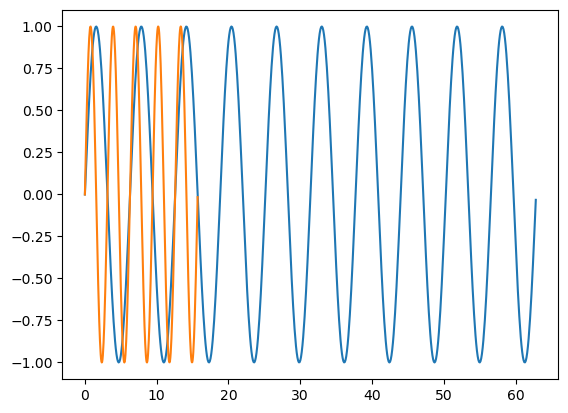

In [107]:
plt.plot(np.array(df_waves['time'][:truncate]).reshape(-1,1),
         np.array(df_waves['sin'][:truncate]).reshape(-1,1))
plt.plot(np.array(df_waves_warp['time'][:truncate]).reshape(-1,1),
         np.array(df_waves_warp['sin'][:truncate]).reshape(-1,1))

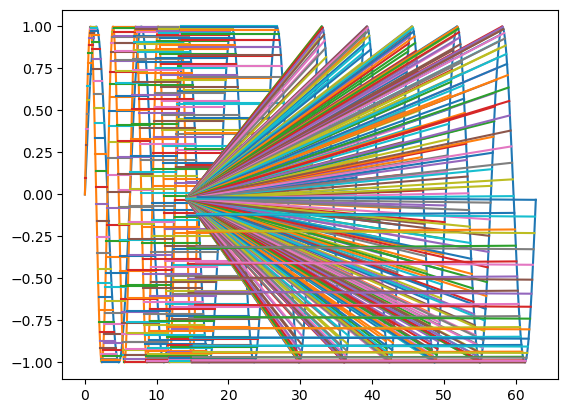

In [108]:
dist_1, warp_path = fastdtw(np.array(df_waves['sin'][:truncate]).reshape(-1,1),
        np.array(df_waves_warp['sin'][:truncate]).reshape(-1,1),dist=euclidean)

plt.plot(np.array(df_waves['time'][:truncate]).reshape(-1,1),
         np.array(df_waves['sin'][:truncate]).reshape(-1,1))
plt.plot(np.array(df_waves_warp['time'][:truncate]).reshape(-1,1),
         np.array(df_waves_warp['sin'][:truncate]).reshape(-1,1))

count = 0
for i,j in warp_path:
    plt.plot([df_waves.iloc[i]['time'],df_waves_warp.iloc[j]['time']],
             [df_waves.iloc[i]['sin'],df_waves_warp.iloc[j]['sin']])

In [109]:
dist_1

200.39578466574147

In [110]:
euclidean(np.array(df_waves['sin'][:truncate]),
        np.array(df_waves_warp['sin'][:truncate]))

ValueError: operands could not be broadcast together with shapes (629,) (315,) 